## Check on filtered Count Matrix

In [1]:
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [7]:
cntMtx_hg = pd.read_csv("cntMtx_hg.csv", index_col=0)
cntMtx_mm = pd.read_csv("cntMtx_mm.csv", index_col=0)

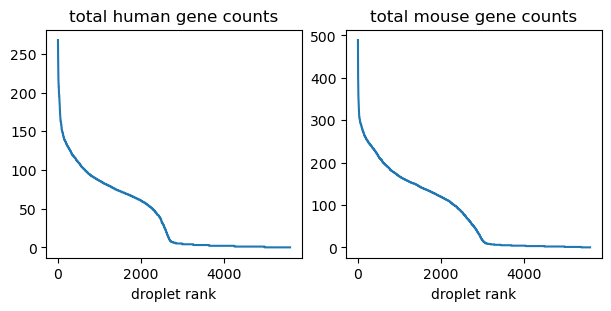

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
pool = [cntMtx_hg, cntMtx_mm]
pooln = ["total human gene counts", "total mouse gene counts"]
for i in range(2):
    axs[i].plot(sorted(pool[i].sum(axis=0), reverse=True))
    axs[i].set_xlabel('droplet rank')
    axs[i].set_title(pooln[i])

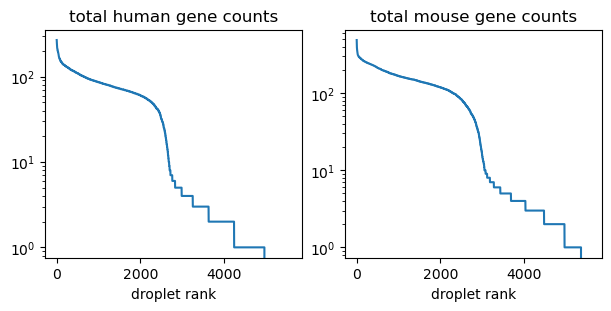

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(6, 3), layout='constrained')
pool = [cntMtx_hg, cntMtx_mm]
pooln = ["total human gene counts", "total mouse gene counts"]
for i in range(2):
    axs[i].plot(sorted(pool[i].sum(axis=0), reverse=True))
    axs[i].set_xlabel('droplet rank')
    axs[i].set_yscale("log")
    axs[i].set_title(pooln[i])

In [14]:
hg_cnts_sorted = sorted(cntMtx_hg.sum(axis=0), reverse=True)
first_diff = np.diff(hg_cnts_sorted)

first_diff_50sum = []
acc = 0
for i,x in enumerate(first_diff):
    if (i+1) % 50 == 0:
        acc += x
        first_diff_50sum.append(acc)
        acc = 0
    else:
        acc += x

second_diff_50sum = np.diff(first_diff_50sum)

for i,x in enumerate(first_diff_50sum):
    if (i+1) % 25 == 0:
        print(x)
    else:
        print(x, end=",")
print('------')
for i,x in enumerate(second_diff_50sum):
    if (i+1) % 25 == 0:
        print(x)
    else:
        print(x, end=",")

-94,-24,-10,-6,-5,-4,-6,-3,-4,-3,-3,-3,-3,-3,-2,-3,-1,-2,-1,-2,-1,-2,-1,-2,-1
-2,-1,-1,-1,-2,-1,-1,-1,-1,-1,-1,-2,-1,-1,-2,-1,-2,-2,-2,-2,-3,-3,-3,-4,-6
-5,-7,-6,-6,-1,-1,-1,0,0,-1,0,0,0,0,0,-1,0,0,0,0,0,0,-1,0,0
0,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1
0,0,0,0,0,0,0,0,0,0,0,------
70,14,4,1,1,-2,3,-1,1,0,0,0,0,1,-1,2,-1,1,-1,1,-1,1,-1,1,-1
1,0,0,-1,1,0,0,0,0,0,-1,1,0,-1,1,-1,0,0,0,-1,0,0,-1,-2,1
-2,1,0,5,0,0,1,0,-1,1,0,0,0,0,-1,1,0,0,0,0,0,-1,1,0,0
0,0,0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,1
0,0,0,0,0,0,0,0,0,0,

In [13]:
mm_cnts_sorted = sorted(cntMtx_mm.sum(axis=0), reverse=True)
first_diff = np.diff(mm_cnts_sorted)

first_diff_50sum = []
acc = 0
for i,x in enumerate(first_diff):
    if (i+1) % 50 == 0:
        acc += x
        first_diff_50sum.append(acc)
        acc = 0
    else:
        acc += x

second_diff_50sum = np.diff(first_diff_50sum)

for i,x in enumerate(first_diff_50sum):
    if (i+1) % 25 == 0:
        print(x)
    else:
        print(x, end=",")
print('------')
for i,x in enumerate(second_diff_50sum):
    if (i+1) % 25 == 0:
        print(x)
    else:
        print(x, end=",")

-191,-17,-15,-10,-8,-6,-7,-7,-7,-8,-6,-7,-4,-5,-4,-6,-3,-4,-3,-4,-3,-2,-3,-3,-2
-2,-2,-2,-3,-3,-2,-2,-2,-2,-3,-2,-2,-3,-3,-2,-2,-3,-3,-3,-4,-4,-3,-5,-4,-5
-6,-6,-5,-6,-7,-5,-8,-8,-9,-8,-4,-2,-1,-1,0,-1,0,0,-1,0,0,0,0,-1,0
0,0,0,0,0,-1,0,0,0,0,0,0,0,0,-1,0,0,0,0,0,0,0,0,0,-1
0,0,0,0,0,0,0,-1,0,0,0,------
174,2,5,2,2,-1,0,0,-1,2,-1,3,-1,1,-2,3,-1,1,-1,1,1,-1,0,1,0
0,0,-1,0,1,0,0,0,-1,1,0,-1,0,1,0,-1,0,0,-1,0,1,-2,1,-1,-1
0,1,-1,-1,2,-3,0,-1,1,4,2,1,0,1,-1,1,0,-1,1,0,0,0,-1,1,0
0,0,0,0,-1,1,0,0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,-1,1
0,0,0,0,0,0,-1,1,0,0,

In [22]:
def get_threshold(mylist, window_size=50):
    # This function gets 2 thresholds in mylist where values change significantly, when sorted reverse
    # 50 is used as window size, since mylist length is about 50K
    mylist_sort = sorted(mylist, reverse=True)
    first_diff = np.diff(mylist_sort)

    first_diff_windowSum = []
    acc = 0
    for i, x in enumerate(first_diff):
        if (i+1) % window_size == 0:
            acc += x
            first_diff_windowSum.append(acc)
            acc = 0
        else:
            acc += x

    second_diff = np.diff(first_diff_windowSum)
    # second_diff is the change of first derivative, find the point where first derivative increase a lot

    # The first cut point is when second_diff change from large postive number to negative
    for (i, x) in enumerate(second_diff):
        if x < 0:
            first_index = i - 1
            break

    # The second cut point is when second_diff gets max in the remaining list
    second_index = np.argmax(second_diff[i:]) + i

    print("first cut-point index:",(first_index + 1) * window_size )
    print("second cut-point index:", (second_index + 1) * window_size )
    return (mylist_sort[(first_index + 1) * window_size], mylist_sort[(second_index + 1) * window_size])


# Choose two cut points to split count_sum into 3 group: 'high' , 'medium', 'low'
# 'low' suggests this droplet doesn't have human/mouse cell, what measured is backgroud noise
# 'medium' suggests this droplet has one human/mouse cell
# 'high' suggests this droplet has two or more human/mouse cell
hg_cp1, hg_cp2 = get_threshold(cntMtx_hg.sum(axis=0))
mm_cp1, mm_cp2 = get_threshold(cntMtx_mm.sum(axis=0))


first cut-point index: 250
second cut-point index: 2700
first cut-point index: 250
second cut-point index: 3000


In [34]:
mm_cp2

15

#### predict droplet type by human and mouse threshold

In [24]:
def pred_num(x, cut1, cut2):
    """Assign number of human/mouse cell to each droplet by the count_sum cut points"""
    assert cut1 > cut2
    if x > cut1:
        return 2
    elif x > cut2:
        return 1
    else:
        return 0


hg_pred_num = [pred_num(x, hg_cp1, hg_cp2) for x in cntMtx_hg.sum(axis=0)]
mm_pred_num = [pred_num(x, mm_cp1, mm_cp2) for x in cntMtx_mm.sum(axis=0)]
hgmm_pred_num = [x+y for x, y in zip(hg_pred_num, mm_pred_num)]

In [31]:
df_droplets = pd.read_csv("mid_df_droplets.csv")
df_droplets["drop_hg_cnts_sml"] = list(cntMtx_hg.sum(axis=0))
df_droplets["drop_mm_cnts_sml"] = list(cntMtx_mm.sum(axis=0))
df_droplets["hg_pred_num"] = hg_pred_num
df_droplets["mm_pred_num"] = mm_pred_num
df_droplets["hgmm_pred_num"] = hgmm_pred_num

In [32]:
df_droplets

,drop_hg_cnts,drop_mm_cnts,drop_hg_geneCover,drop_mm_geneCover,drop_hg_cnts_sml,drop_mm_cnts_sml,hg_pred_num,mm_pred_num,hgmm_pred_num
0,64,1874,64,1816,0,7,0,0,0
1,176,5660,174,5429,6,50,0,1,1
2,92,3951,92,3707,1,13,0,0,0
3,16366,179,14269,170,246,19,2,1,3
4,11360,127,10315,126,159,10,2,0,2
...,...,...,...,...,...,...,...,...,...
5573,6,697,6,677,0,21,0,1,1
5574,12,569,12,560,0,11,0,0,0
5575,8,40,8,40,1,0,0,0,0
5576,56,88,55,88,3,3,0,0,0


In [ ]:
df_droplets_sort1 = df_droplets.sort_values(by=['drop_hg_cnts_sml'], )

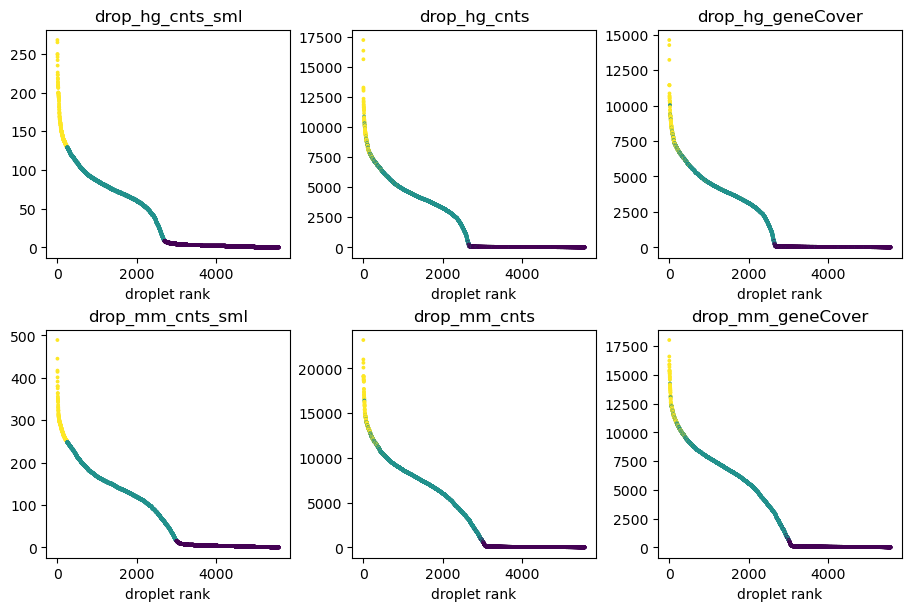

In [48]:
fig, axs = plt.subplots(2, 3, figsize=(9, 6), layout='constrained')
pooln = [["drop_hg_cnts_sml", "drop_hg_cnts", "drop_hg_geneCover"],["drop_mm_cnts_sml", "drop_mm_cnts", "drop_mm_geneCover"]]
poolc = ["hg_pred_num","mm_pred_num"]
for i in range(2):
    for j in range(3):
        tmp = df_droplets.sort_values(by=pooln[i][j], ascending=False)
        axs[i][j].scatter(range(df_droplets.shape[0]), tmp[pooln[i][j]], s=3, c=tmp[poolc[i]])
        axs[i][j].set_xlabel('droplet rank')
        axs[i][j].set_title(pooln[i][j])

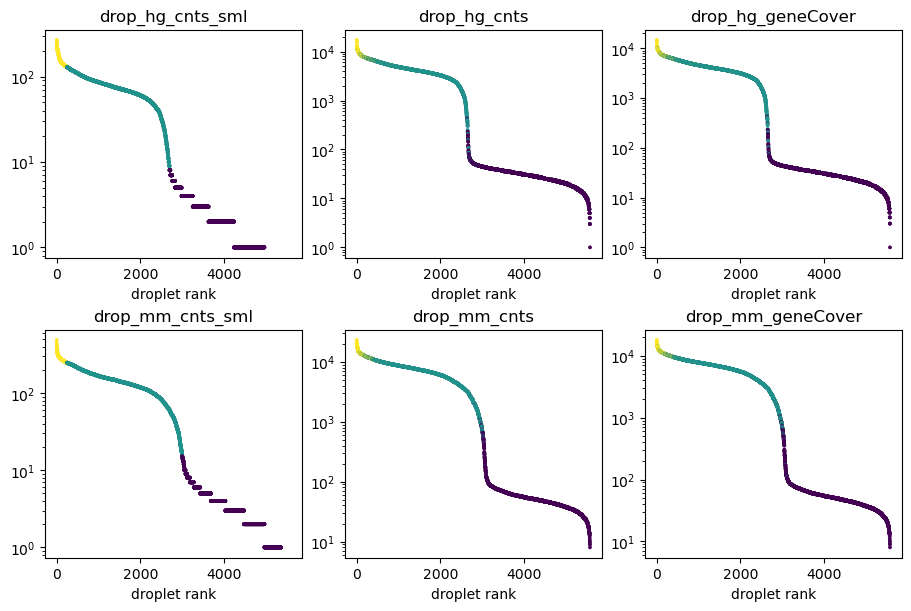

In [51]:
fig, axs = plt.subplots(2, 3, figsize=(9, 6), layout='constrained')
pooln = [["drop_hg_cnts_sml", "drop_hg_cnts", "drop_hg_geneCover"],["drop_mm_cnts_sml", "drop_mm_cnts", "drop_mm_geneCover"]]
poolc = ["hg_pred_num","mm_pred_num"]
for i in range(2):
    for j in range(3):
        tmp = df_droplets.sort_values(by=pooln[i][j], ascending=False)
        axs[i][j].scatter(range(df_droplets.shape[0]), tmp[pooln[i][j]], s=3, c=tmp[poolc[i]])
        axs[i][j].set_xlabel('droplet rank')
        axs[i][j].set_title(pooln[i][j])
        axs[i][j].set_yscale("log")

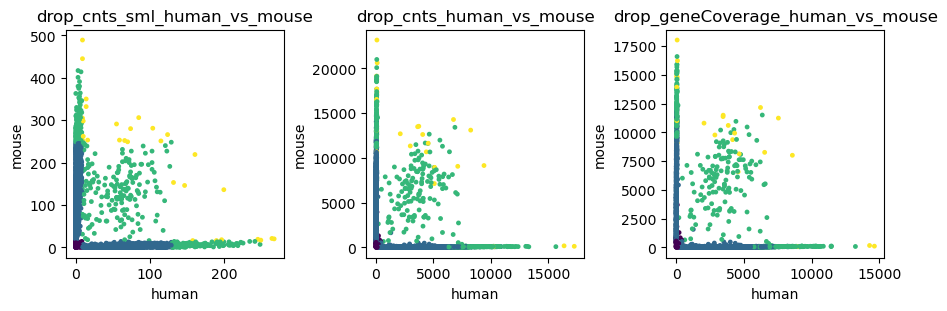

In [74]:
fig2, axs2 = plt.subplots(1, 3, figsize=(9, 3), layout='constrained')
pool_x = ["drop_hg_cnts_sml", "drop_hg_cnts", "drop_hg_geneCover"]
pool_y = ["drop_mm_cnts_sml", "drop_mm_cnts", "drop_mm_geneCover"]
pooln = ["drop_cnts_sml_human_vs_mouse","drop_cnts_human_vs_mouse", "drop_geneCoverage_human_vs_mouse"]
for i in range(3):
        axs2[i].scatter(df_droplets[pool_x[i]], df_droplets[pool_y[i]], c=df_droplets["hgmm_pred_num"] , s=6)
        axs2[i].set_xlabel('human')
        axs2[i].set_ylabel('mouse')
        axs2[i].set_title(pooln[i])

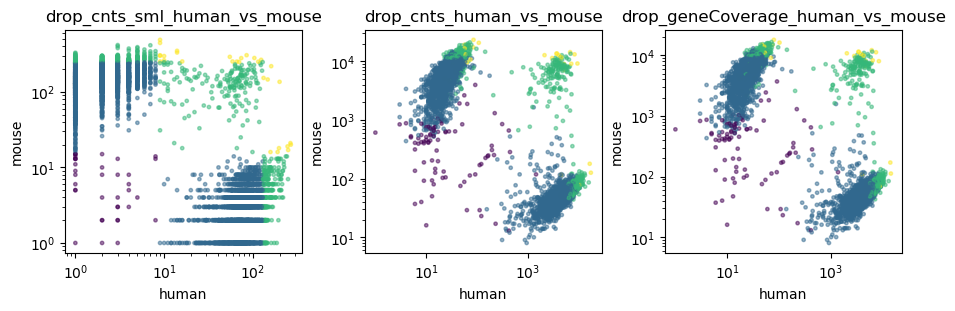

In [75]:
fig2, axs2 = plt.subplots(1, 3, figsize=(9, 3), layout='constrained')
for i in range(3):
        axs2[i].scatter(df_droplets[pool_x[i]], df_droplets[pool_y[i]], c=df_droplets["hgmm_pred_num"] , alpha=0.5, s=6)
        axs2[i].set_xlabel('human')
        axs2[i].set_ylabel('mouse')
        axs2[i].set_title(pooln[i])
        axs2[i].set_xscale("log")
        axs2[i].set_yscale("log")